<a href="https://colab.research.google.com/github/subbu521/EVA4/blob/master/S12/EVA_S12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import sys
sys.path.append('/content/drive/My Drive/EVA/S7')

In [0]:
#!wget http://cs231n.stanford.edu/tiny-imagenet-200.zip

In [0]:
#!unzip -q 'tiny-imagenet-200.zip'

In [0]:
import utils
from utils import load_training_images

In [0]:
BATCH_SIZE = 20
NUM_CLASSES = 200
NUM_IMAGES_PER_CLASS = 500
NUM_IMAGES = NUM_CLASSES * NUM_IMAGES_PER_CLASS
TRAINING_IMAGES_DIR = './tiny-imagenet-200/train/'
TRAIN_SIZE = NUM_IMAGES

NUM_VAL_IMAGES = 10000
VAL_IMAGES_DIR = './tiny-imagenet-200/val/'

IMAGE_SIZE = 64
NUM_CHANNELS = 3
IMAGE_ARR_SIZE = IMAGE_SIZE * IMAGE_SIZE * NUM_CHANNELS
training_images, training_labels, training_files = load_training_images(TRAINING_IMAGES_DIR, batch_size=BATCH_SIZE)

In [0]:
import albumentations as A
from evaAlbumentations import AlbumentationTransforms
import numpy as np
import cv2
means = (0.49139968, 0.48215841, 0.44653091)
stdevs = (0.24703223, 0.24348513, 0.26158784)
train_transforms = AlbumentationTransforms([A.Normalize(mean=means, std=stdevs)])
'''
AlbumentationTransforms(
    [ A.PadIfNeeded(40,40,border_mode=cv2.BORDER_CONSTANT, value=np.array(means)*255),
      A.RandomCrop(32, 32,  always_apply=True),
      A.HorizontalFlip(),
      A.Normalize(mean=means, std=stdevs),
      A.Cutout(num_holes=1, max_h_size=8, max_w_size=8, p=1)])
'''



test_transforms = AlbumentationTransforms([A.Normalize(mean=means, std=stdevs)])

In [0]:
import evadata 
from evadata import TinyImagenetDataset
dataset, class_names = evadata.alldata('./tiny-imagenet-200/')
trainlen = int(len(dataset)*0.7)
train = TinyImagenetDataset(dataset[:trainlen], transform=train_transforms)
test = TinyImagenetDataset(dataset[trainlen:], transform=test_transforms)

In [0]:
import evadataloader
dataloader = evadataloader.DataLoader()

trainloader = dataloader.load(train)
testloader = dataloader.load(test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([512, 3, 64, 64])
torch.Size([512])
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)


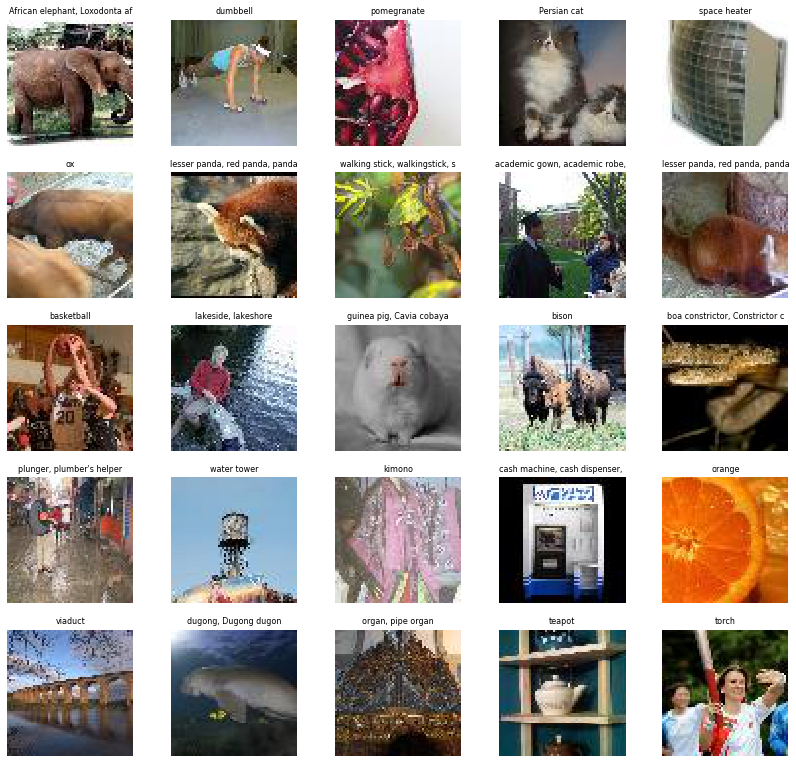

In [0]:
from __future__ import print_function
def unnormalize(img):
  img = img.cpu().numpy().astype(dtype=np.float32)
  print(img.shape)
  for i in range(img.shape[0]):
    img[i] = (img[i]*stdevs[i])+means[i]
  
  return np.transpose(img, (1,2,0))

%matplotlib inline
import matplotlib.pyplot as plt
dataiter = iter(trainloader)

images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

num_classes = len(class_names)
r, c = 5, 5
fig = plt.figure(figsize=(14,14))
fig.subplots_adjust(hspace=0.01, wspace=0.3)
for i in range(r):
  for j in range(c):
    idx = i*c + j
    ax = plt.subplot(r, c, idx+1)
    ax.set_title(class_names[labels[idx]][:30], fontdict={'fontsize': 8})
    plt.axis('off')
    ax.imshow(unnormalize(images[idx]), interpolation='none')
plt.show()

Let us show some of the training images, for fun.



In [0]:
import evamodel

net = evamodel.ResNet18(num_classes=len(class_names))

In [0]:
from torchsummary import summary
import torch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = net.to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [0]:
import sys
from torch_lr_finder import LRFinder
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-7, momentum=0.9, nesterov=True, weight_decay=1e-4)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=100, num_iter=100, step_mode="exp")
# Plot learning rate vs loss
lr_finder.plot()

# Reset graph
lr_finder.reset()

  pip install torch-lr-finder -v --global-option="amp"


RuntimeError: ignored

In [0]:
loss = lr_finder.history['loss']
lr = lr_finder.history['lr']
max_lr = lr[loss.index(min(loss))]
max_lr

In [0]:
from torch.optim.lr_scheduler import StepLR
from torch.optim.lr_scheduler import ReduceLROnPlateau
from evascheduler import train,test
from torch.optim.lr_scheduler import OneCycleLR
L1lambda = 0
L2lambda = 0
EPOCHS = 24
model =  net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, nesterov=True, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer,
                 max_lr=0.03,
                 total_steps=25,
                 epochs=25,
                 pct_start=0.2,
                 cycle_momentum=False,
                 base_momentum=0.85,
                 max_momentum=0.95,
                 div_factor=10.,
                 final_div_factor=1e4,
                 last_epoch=-1)

for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, trainloader, optimizer, epoch,criterion)
    scheduler.step()
    test(model, device, testloader)


In [0]:
from evascheduler import draw_graph
draw_graph()


In [0]:
from evascheduler import get_misclassified
misclassified = get_misclassified()

In [0]:
import utils
from utils import plot_images
plot_images(misclassified,classes,"misclassified.png")

In [0]:
model_save_name = 'models11.pt'
PATH = F"/content/drive/My Drive/EVA/S7/{model_save_name}" 
torch.save(model.state_dict(), PATH)

In [0]:
path = F"/content/drive/My Drive/EVA/S7/{model_save_name}"
model.load_state_dict(torch.load(path))

In [0]:
from utils import print_triangular_lr
num_iterations = 10000
stepsize = 1500
base_lr = 0.001
max_lr = 0.03
lr_trend = list()

for iteration in range(num_iterations):
    lr = print_triangular_lr(iteration, stepsize, base_lr, max_lr)
    lr_trend.append(lr)

plt.plot(lr_trend)